In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ensembles = list(range(1,26))
# ensembles.extend(list(range(60,79)))
ensembles.extend(list(range(100,118)))
# ensembles.extend(list(range(130,137)))

In [11]:
sio2_dict = {}
n_impact_dict = {}
for ensemble in ensembles:
    with open("./sio2_percent_tables/3june2021/ensemble_{:d}.csv".format(ensemble), "r")as f:
        sio2_dict[ensemble] = pd.read_csv(f).fillna(0)
    with open("./impact_probabilities_export/ensemble_{:d}.csv".format(ensemble), "r")as f:
        n_impact_dict[ensemble] = pd.read_csv(f).fillna(0)

In [4]:
df = sio2_dict[1].loc[:,[str(p) for p in range(60,71)]].sum(axis=1) / 40


In [5]:
ensemble

117

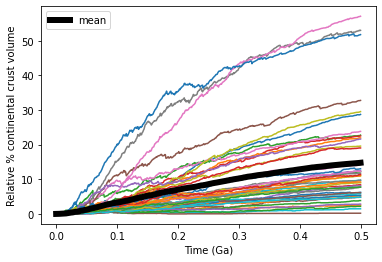

In [6]:
crust_dict = {}
for ensemble in ensembles:
    percent_bins=[]
    for p in range(60,99):
        if str(p) in list(sio2_dict[ensemble].columns.values):
            percent_bins.append(str(p))
    df = 100* sio2_dict[ensemble].loc[:,percent_bins].sum(axis=1) / 40
    crust_dict[ensemble] = df.values
    plt.plot(df.index.values/1000, df.values)
    plt.xlabel("Time (Ga)")
    plt.ylabel("Relative % continental crust volume")
crust_df = pd.DataFrame(crust_dict, index=df.index.values)
crust_mean = crust_df.mean(axis=1)
plt.plot(df.index.values/1000, crust_mean.values, c='k', label="mean", lw=6)
plt.legend()

In [7]:
crust_df['mean'] = crust_df.mean(axis=1)
crust_df['min'] = crust_df.min(axis=1)
crust_df['max'] = crust_df.max(axis=1)
crust_df['stdev'] = crust_df.std(axis=1)
standard_error = crust_df['stdev']/np.sqrt(len(ensembles))
crust_df['e05'] = crust_df['mean'] - standard_error
crust_df['e95'] = crust_df['mean'] + standard_error
crust_df['c95'] = crust_df['mean'] + standard_error * 1.96
crust_df['c05'] = crust_df['mean'] - standard_error * 1.96

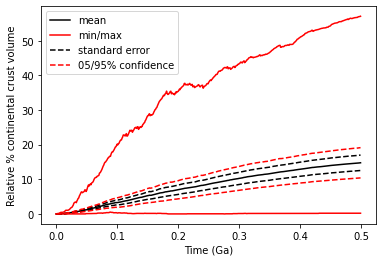

In [8]:
plt.plot(df.index.values/1000, crust_df['mean'], c='k', label='mean')
plt.plot(df.index.values/1000, crust_df['min'].clip(lower=0), c='r', label='min/max')
plt.plot(df.index.values/1000, crust_df['max'], c='r')
plt.plot(df.index.values/1000, crust_df['e05'], '--', c='k', label='standard error')
plt.plot(df.index.values/1000, crust_df['e95'], '--', c='k')
plt.plot(df.index.values/1000, crust_df['c05'].clip(lower=0), '--', c='r', label='05/95% confidence')
plt.plot(df.index.values/1000, crust_df['c95'], '--', c='r')
plt.xlabel("Time (Ga)")
plt.ylabel("Relative % continental crust volume")
plt.legend()
plt.show()
plt.close()

In [9]:
final_values = {summary_characteristic:[] for summary_characteristic in ['mean', 'min', 'max',
                                                                         'standard_error', 'CI95']}
for i in range(3,len(ensembles)+1):
    crust_dict = {}
    for ensemble in ensembles[:i]:
        percent_bins=[]
        for p in range(60,100):
            if str(p) in list(sio2_dict[ensemble].columns.values):
                percent_bins.append(str(p))
        df = 100* sio2_dict[ensemble].loc[:,percent_bins].sum(axis=1) / 40
        crust_dict[ensemble] = df.values
    crust_df = pd.DataFrame(crust_dict, index=df.index.values)
    crust_mean = crust_df.mean(axis=1)
    crust_df['mean'] = crust_df.mean(axis=1)
    crust_df['min'] = crust_df.min(axis=1)
    crust_df['max'] = crust_df.max(axis=1)
    crust_df['stdev'] = crust_df.std(axis=1)
    standard_error = crust_df['stdev']/np.sqrt(len(ensembles))
    crust_df['e05'] = crust_df['mean'] - standard_error
    crust_df['e95'] = crust_df['mean'] + standard_error
    crust_df['c95'] = crust_df['mean'] + standard_error * 1.96
    crust_df['c05'] = crust_df['mean'] - standard_error * 1.96
    final_values['mean'].append(crust_df['mean'][499])
    final_values['min'].append(crust_df['min'][499])
    final_values['max'].append(crust_df['max'][499])
    final_values['standard_error'].append(standard_error[499])
    final_values['CI95'].append(standard_error[499] * 1.96)

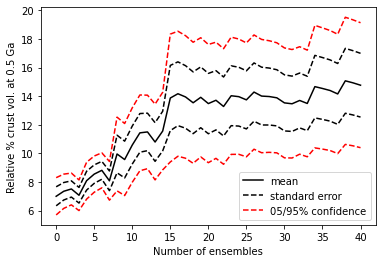

In [10]:
plt.plot(final_values['mean'], c='k', label='mean')
plt.plot(np.array(final_values['mean'])+np.array(final_values['standard_error']), 
         '--', c='k', label='standard error')
plt.plot(np.array(final_values['mean'])-np.array(final_values['standard_error']),'--', c='k', )
plt.plot(np.array(final_values['mean'])+np.array(final_values['CI95']), 
         '--', c='r', label='05/95% confidence')
plt.plot(np.array(final_values['mean'])-np.array(final_values['CI95']),'--', c='r', )
plt.xlabel("Number of ensembles")
plt.ylabel("Relative % crust vol. at 0.5 Ga")
plt.legend()
plt.show()
plt.close()

In [17]:
total_impact_dict = {}
total_impact_dict['low'] = n_impact_dict[ensemble].low
total_impact_dict['high'] = n_impact_dict[ensemble].high
for ensemble in ensembles:
    total_impact_dict[ensemble] = n_impact_dict[ensemble].total

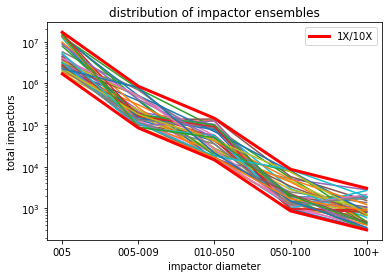

In [33]:
for ensemble in ensembles:
    plt.plot(total_impact_dict[ensemble])
plt.plot(n_impact_dict[1]['Unnamed: 0'], total_impact_dict['low'], c='r', lw=3, label='1X/10X')
plt.plot(n_impact_dict[1]['Unnamed: 0'], total_impact_dict['high'], c='r', lw=3)
plt.ylabel('total impactors')
plt.yscale('log')
plt.xlabel("impactor diameter")
plt.title("distribution of impactor ensembles")
plt.legend()
plt.show()
plt.close()